In [1]:
from __future__ import print_function
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import sys,os
import random
import copy

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))
from method import print_network_stats

from simulations import make_bg_matrix, implant_biclusters, group_genes
from simulations import simulate_network,find_starting_points,assign_nodes, grow_subnetworks, check_connectivity

%matplotlib inline

N = 10 # n_bics
n_pats = 200
n_genes = 2000

g_sizes = [5,10,20,50,100] # 
p_sizes = [10,20,50,100] # 10-50% of the dataset
bic_median = 2.0 #
allow_gene_overlap = True
allow_patient_overlap = True

# network parameters
beta = 0.9
delta = 4.0

outdir = "simulated_datasets/"
basename = "simulated" #

In [2]:
def avg_SNR(biclusters):
    SNRs = []
    for bc in biclusters:
        g = set(bc["genes"])
        p = set(bc["patients"])
        bg_g = set(df.index.values).difference(g)
        bg_p = set(df.columns.values).difference(p)
        m = df.loc[g,p].mean(axis=1)
        v = df.loc[g,p].std(axis=1)
        m_bg = df.loc[g,bg_p].mean(axis=1)
        v_bg = df.loc[g,bg_p].std(axis=1)
        SNRs.append(np.average((m-m_bg)/(v+v_bg)))
    return np.average(SNRs)

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (5x10) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.04
	gamma: 2.47368421053


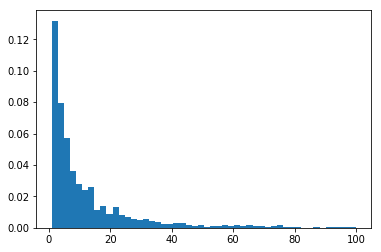

Undirected graph with 1 connected components; with 2000 nodes and 14792 edges;
runtime: 66.66 s


	min and max node degree: 768,1
	Max. number of biclusters per gene: 2
	Unique gene groups 12
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (5x20) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.02
	gamma: 2.47368421053


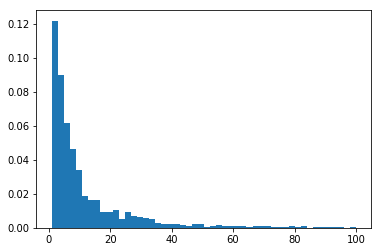

Undirected graph with 1 connected components; with 2000 nodes and 14880 edges;
runtime: 74.3 s


	min and max node degree: 540,1
	Max. number of biclusters per gene: 1
	Unique gene groups 11
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (5x50) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.0
	gamma: 2.47368421053


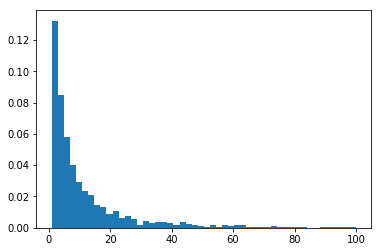

Undirected graph with 1 connected components; with 2000 nodes and 14391 edges;
runtime: 72.11 s


	min and max node degree: 618,1
	Max. number of biclusters per gene: 2
	Unique gene groups 12
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (5x100) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.01
	gamma: 2.47368421053


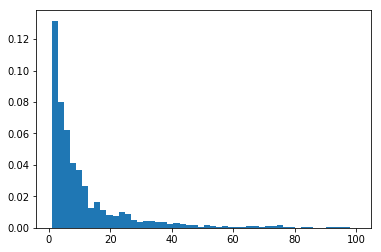

Undirected graph with 1 connected components; with 2000 nodes and 14467 edges;
runtime: 63.53 s


	min and max node degree: 596,1
	Max. number of biclusters per gene: 1
	Unique gene groups 11
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (10x10) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.03
	gamma: 2.47368421053


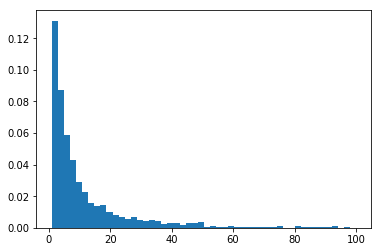

Undirected graph with 1 connected components; with 2000 nodes and 14603 edges;
runtime: 60.83 s


	min and max node degree: 643,1
	Max. number of biclusters per gene: 2
	Unique gene groups 13
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (10x20) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.01
	gamma: 2.47368421053


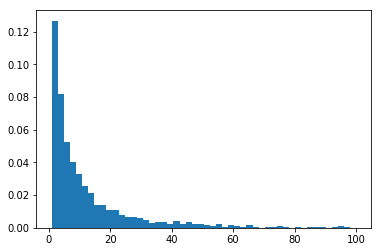

Undirected graph with 1 connected components; with 2000 nodes and 15498 edges;
runtime: 70.1 s


	min and max node degree: 504,1
	Max. number of biclusters per gene: 2
	Unique gene groups 13
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (10x50) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.0
	gamma: 2.47368421053


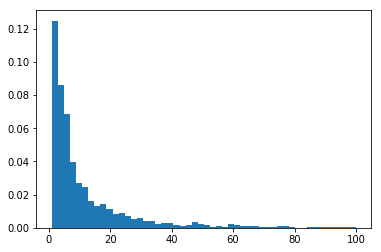

Undirected graph with 1 connected components; with 2000 nodes and 14677 edges;
runtime: 71.42 s


	min and max node degree: 612,1
	Max. number of biclusters per gene: 2
	Unique gene groups 13
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (10x100) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 0.95
	gamma: 2.47368421053


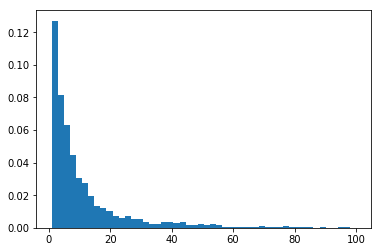

Undirected graph with 1 connected components; with 2000 nodes and 14945 edges;
runtime: 65.45 s


	min and max node degree: 646,1
	Max. number of biclusters per gene: 2
	Unique gene groups 16
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (20x10) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.04
	gamma: 2.47368421053


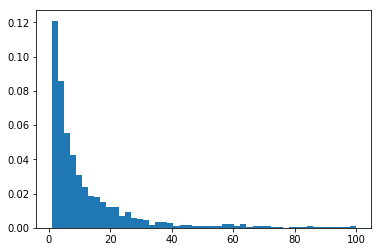

Undirected graph with 1 connected components; with 2000 nodes and 14867 edges;
runtime: 66.0 s


	min and max node degree: 644,1
	Max. number of biclusters per gene: 2
	Unique gene groups 17
	All subnetworks connected: True

Simulate a matrix of (2000x200) (genesXpatients) expressions
Implant 10 (20x20) (genesXpatients) biclusters into the matrix;


Will create 10 biclusters with gene and patient overlap 


	Average SNR for simulated biclusters: 1.03
	gamma: 2.47368421053


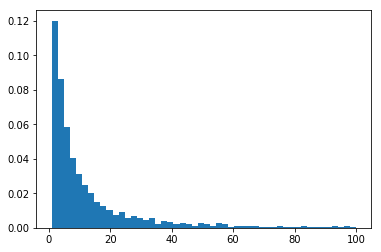

Undirected graph with 1 connected components; with 2000 nodes and 15705 edges;
runtime: 68.49 s


	min and max node degree: 635,1
	Max. number of biclusters per gene: 2
	Unique gene groups 17


AttributeError: 'NoneType' object has no attribute 'nodes'

In [3]:
n_bics=N

for genes_per_bic in g_sizes:
    for pats_per_bic in p_sizes:    
        print("Simulate a matrix of (%sx%s) (genesXpatients) expressions"%(n_genes,n_pats))
        print("Implant %s (%sx%s) (genesXpatients) biclusters into the matrix;"%(N,genes_per_bic,pats_per_bic))
        df = make_bg_matrix(n_genes,n_pats)
        df,biclusters,anno, filename = implant_biclusters(df,genes_per_bic=genes_per_bic,pats_per_bic=pats_per_bic,
                                              max_n_bics =N,bic_median=bic_median, outdir=outdir,filename=basename,
                                                          g_overlap=allow_gene_overlap,p_overlap=allow_patient_overlap)
        print("\tAverage SNR for simulated biclusters:", round(avg_SNR(biclusters),2))
        
        # simulate network
        G = simulate_network(n_genes,beta, delta)
        #n_genes*math.log(n_genes,3)
        
        # group genes by bicluster membership; star from genes assigned to many biclusters
        gene_groups, max_bics_per_gene ,anno = group_genes(anno,verbose = True)
        
        # assign gene names to nodes such that each bicluster form a CC
        G2 = grow_subnetworks(G,gene_groups,max_bics_per_gene, n_trials= 10, verbose=False)
        # make three more attemtps to find a solution
        n_attempt =2
        if G2 is None and n_attempt>4:
            print("Try growing subnetworks once again in verbose mode ...\nAttempt #",str(n_attempt),file=sys.stderr)
            G2 = grow_subnetworks(G,gene_groups,max_bics_per_gene, n_trials= 10, verbose=True)
            n_attempt+=1
        # check whether resulting subnetworks connected
        are_connected = check_connectivity(G2, anno,verbose=False)
        print("\tAll subnetworks connected:",are_connected)
        network_file = outdir+"/networks/"+filename
        # clean node attributes in the network
        for node in G2.nodes():
            del G2.node[node]['bics']
        # save network
        nx.write_gpickle(G2,network_file+".gpickle")
        # save as weighted edgelist 
        nx.set_edge_attributes(G2, 'weight',1)
        nx.write_weighted_edgelist(G2, network_file+'.tab')
        # load network
        #G2 =  nx.read_gpickle(network_file)
        #G2.nodes() == G.nodes(), sorted(G2.edges()) == sorted(G.edges())
        print("")